In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [17]:
daynum = 73
print(daynum)

if daynum > 50:
    datadir = '/Users/padmaprabagaran/dev/honey-bee-behavior/Data/zenodo/beetrajectories_days_050_to_085/'
else:
    datadir = '/Users/padmaprabagaran/dev/honey-bee-behavior/Data/zenodo/beetrajectories_days_000_to_049/'



73


## Parameters
#### daynum: <br/> framenum: <br/> uid: unique identification of each bee <br/> x: <br/> y: <br/> camera: <br/> theta:


In [18]:
df = pd.read_hdf('{}beetrajectories_{:0>3}.hdf'.format(datadir,daynum))

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7882401 entries, 0 to 7882400
Data columns (total 7 columns):
 #   Column    Dtype  
---  ------    -----  
 0   daynum    int64  
 1   framenum  int64  
 2   uid       int64  
 3   x         int64  
 4   y         int64  
 5   camera    int64  
 6   theta     float64
dtypes: float64(1), int64(6)
memory usage: 481.1 MB


In [21]:
df.shape

(7882401, 7)

In [22]:
df.head()

,daynum,framenum,uid,x,y,camera,theta
0,73,4,3127,2623,4760,0,0.990359
1,73,5,3127,2624,4760,0,0.978603
2,73,6,3127,2623,4760,0,0.974273
3,73,7,3127,2624,4760,0,0.917898
4,73,8,3127,2623,4760,0,0.958766


In [23]:
df.columns

Index(['daynum', 'framenum', 'uid', 'x', 'y', 'camera', 'theta'], dtype='object')

## What type of values are there in each variable

In [24]:
df.nunique(axis=0)

daynum            1
framenum     259195
uid             187
x              2228
y              4213
camera            2
theta       1753309
dtype: int64

In [34]:
# values of framenum
# 3 frames for every second of the day
df.framenum.unique()

array([     4,      5,      6, ..., 253156, 253161, 253166])

In [ ]:
# there are 187 bees in this dataframe
# check
# len(df.uid.unique())

## Bees that most frequently captured

In [37]:
df['uid'].value_counts()

5214    139397
4937    136050
4617    118872
3804    112829
5333    106670
         ...  
3139      2307
5276      2139
4964      1904
5247       906
5215       293
Name: uid, Length: 187, dtype: int64

In [36]:
# top 20 most frequently seen bees 
df['uid'].value_counts().head(n=20)

5214    139397
4937    136050
4617    118872
3804    112829
5333    106670
5050    102278
5164     99567
5081     99382
5142     99118
4945     97880
5001     96971
5076     96659
4520     95285
3501     94643
5021     92657
3797     91101
3194     90838
3415     90536
5228     90201
3421     89491
Name: uid, dtype: int64

## At which timeframe were the bees most active on this day

In [58]:
""" assumption: I am assuming that the more bees that are present in 
 the camera frame is when the bees are most active """

df.groupby('framenum')['uid'].count().sort_values(ascending=False).head(50)

framenum
106163    53
106183    53
106164    52
106154    52
106179    52
106132    52
106131    51
106118    51
106156    51
106139    51
106138    51
106161    51
106182    51
106162    51
236409    50
236396    50
106167    50
106152    50
106173    50
106140    50
236395    50
236382    50
199885    50
236383    50
199879    50
236958    50
106180    50
106136    50
106181    50
106155    50
106157    50
106186    50
236410    50
106189    50
106188    50
106117    50
106190    50
106119    50
106187    50
236412    50
199880    50
106129    50
236400    50
236377    49
236869    49
236870    49
236397    49
236376    49
199817    49
236378    49
Name: uid, dtype: int64

In [72]:
df_min = df[df.framenum % (3*60) == 0]
df_min

,daynum,framenum,uid,x,y,camera,theta
101,73,0,3135,2198,4415,0,-2.013450
272,73,180,3135,2033,4679,0,1.275610
424,73,360,3135,1318,3607,0,-1.728880
534,73,3060,3135,1654,4967,0,-1.848600
692,73,4140,3135,1678,4943,0,-1.869660
...,...,...,...,...,...,...,...
7881555,73,257400,5338,1904,4808,0,0.629268
7881714,73,257580,5338,1831,4743,0,-1.834670
7882010,73,257940,5338,2087,4478,0,2.920020
7882174,73,258120,5338,1591,4519,0,3.135500


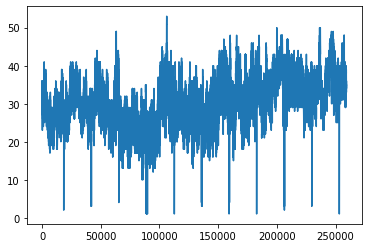

In [82]:
counts = df.groupby('framenum')['uid'].count()
plt.plot(counts.index,counts.values)

#### there are noticeable drops in activity in consistent intervals (why?)

## Foraging

In [40]:
## TO DO: Find documentation for datafunctions or document data functions after 
## testing each function

from bees_lifetimetracking_2018data import datafunctions

In [44]:
dataDir = '/Users/padmaprabagaran/dev/honey-bee-behavior/Data/zenodo/df_day1min_alldays/'
dfday = pd.read_hdf(dataDir+'df_day1min_73.hdf')
dfday.head()

,Age,Num. observations,Honey,Brood care,Pollen,Dance floor,Other,Frame 0,Frame 1,Frame 2,...,Num. outside trips,Num. dance floor visits,Dispersion-minute avg.,Frame 0 - Num. crossings,Frame 1 - Num. crossings,Frame 2 - Num. crossings,Frame 3 - Num. crossings,Frame 4 - Num. crossings,Frame 5 - Num. crossings,timedivision
0,47.0,101.0,0.0,0.0,0.0,0.346535,0.653465,0.0,0.0,0.0,...,0.0,1.0,122.080549,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,47.0,171.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,82.578514,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
dfday.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269280 entries, 0 to 269279
Data columns (total 36 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       269280 non-null  float64
 1   Num. observations         55772 non-null   float64
 2   Honey                     55772 non-null   float64
 3   Brood care                55772 non-null   float64
 4   Pollen                    55772 non-null   float64
 5   Dance floor               55772 non-null   float64
 6   Other                     55772 non-null   float64
 7   Frame 0                   55772 non-null   float64
 8   Frame 1                   55772 non-null   float64
 9   Frame 2                   55772 non-null   float64
 10  Frame 3                   55772 non-null   float64
 11  Frame 4                   55772 non-null   float64
 12  Frame 5                   55772 non-null   float64
 13  Median speed              269280 non-null  f

In [47]:
len(dfday['Bee unique ID'].unique())
## matches with the dataframe above

187

In [48]:
dfday.nunique(axis=0)

Age                             5
Num. observations             171
Honey                        6072
Brood care                   3274
Pollen                       3028
Dance floor                  5127
Other                       10657
Frame 0                       546
Frame 1                       864
Frame 2                       213
Frame 3                       603
Frame 4                      2503
Frame 5                      2157
Median speed                 1879
Speed IQR                   10850
Speed 90th quantile         15036
Dispersion (avg)            53236
Exit distance (median)      45076
Fraction squares visited        0
Day number                      1
Festoon                         0
Empty comb                   1309
blank1                          0
blank2                          0
Bee unique ID                 187
Cohort ID                       5
Num. outside trips              1
Num. dance floor visits        19
Dispersion-minute avg.      53236
Frame 0 - Num.

#### Are parameters festoon, fraction squares visited, blank1, blank2 needed?

In [ ]:
# number of unique bees foraging per day

In [ ]:
# .get_inout_estimates : 

numtimedivs = len(dfday['timedivision'].unique())
day_uids, day_ages, all_inhive, bee_obs, 
                bee_exitdist = datafunctions.get_inout_estimates(dfday,
                                                                 numtimedivs=numtimedivs)